#  LU3MA201 : Projet / Travail d’étude et de recherche

<!-- dom:AUTHOR: Aya Bouzidi at [Sorbonne Université](http://www.sorbonne-universite.fr/), -->
<!-- Author: -->  
**Aya Bouzidi**, **Amaia Cardiel**, **Camil Grimal**, **Elysé Miadantsoa Rasoloarivony** ( Etudiants en L3 de Mathématiques à [Sorbonne Université](http://www.sorbonne-universite.fr/) ).

Sous la direction de : **Fréderic Nataf** ( Directeur de recherche au [Laboratoire J.L. Lions](https://www.ljll.math.upmc.fr/), [Sorbonne Université](http://www.sorbonne-universite.fr/) )

Licence <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND</a>

# 1 Algorithme simple de reconnaissance de chiﬀres manuscrits

<div id="ch:proba-stats"></div>

Ce travail est une introduction à l'apprentissage automatique, il s'agit d'écrire un programme simple de reconnaissance de chiffres manuscrits. Pour cela, on utilise la base de données **MNIST** très utilisée en machine learning. Cette base est constituée de **70 000** images de chiffres écrits à la main, chaque image est constituée de **28x28** pixels. Voici un exemple de chiffres de la base MNIST ([source](https://fr.wikipedia.org/wiki/Base_de_donn%C3%A9es_MNIST#/media/Fichier:MnistExamples.png)):


<!-- dom:FIGURE: [base.png, style="width:90%;max-width:800px;" frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="base.png" style="width:50%;max-width:800px;">

<!-- end figure -->

Les instructions suivantes permettent de charger les données de chiffres manuscrits disponibles dans le package mnist-original.mat :
<!-- --- begin exercise --- -->

In [2]:
#Code proposé par M.Nataf:Séance 1
import scipy.io as spi
import numpy as np
import matplotlib.pyplot as plt
mat=spi.loadmat("mnist-original.mat")
data=np.transpose(mat['data'])
label=np.array(mat['label']) #label: chiffre numérisé
label=label.astype(int) #Les labels sont stockés en flottants, on les convertit en entiers

<div id="ch:proba-stats"></div>
Regardons un exemple:
<!-- --- begin exercise --- -->

Le chiffre est 1


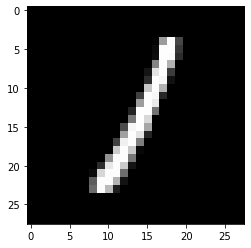

In [3]:
#Lecture du 2021-ième chiffre de la base de données:
print('Le chiffre est',label[0][12021])
#Affichage du chiffre:
plt.imshow(data[12021].reshape(28,28),cmap='gray')
plt.show()

<div id="ch:proba-stats"></div>
Le chiffre codé est donc bien un 1.
<!-- --- begin exercise --- -->

<div id="ch:proba-stats"></div>

**Notre premier programme de classification est basé sur l'algorithme suivant:**

* **Etape 1:** On partage notre base de données en deux parties: la première partie servira de base d'apprentissage avec 80% de données et la deuxième partie servira de base de tests avec 20% de données.

* **Etape 2:** Dans la base d'apprentissage, on calcule les centroïdes des classes de 0 à 9 en utilisant une distance donnée.

* **Etape 3:** Pour chaque vecteur de la base de tests, on lui attribue le chiffre dont le centroïde est le plus proche.

* **Etape 4:** Finalement, on déduit une estimation du pourcentage de prédictions correctes sur la base de tests.


Plusieurs distances peuvent être utilisées. Dans cette partie, on choisit de travailler avec la distance euclidienne et la distance cosine et de comparer leurs précisions.

**Distances utilisées**:

* Distance euclidienne

* Similarité cosinus (cosine)

<!-- --- begin exercise --- -->

# 1.1 Distance euclidienne

<div id="ch:proba-stats"></div>

**Etape 1 :** Définir la base d'apprentissage et la base de tests.

<!-- --- begin exercise --- -->

In [9]:
Y,y=data,label[0]
#On change l'ordre des données et des labels avec la même permutation pour que data__test et data_app soient hétérogènes...
m=np.random.permutation((len(y))) #permutation arbitraire
Y_m=Y[m] #data après permutation
y_m=y[m] #labels après permutation
n=len(Y) #nombre d'images dans la base donnée
n_80=80*n/100 #nombre d'images dans la base d'apprentissage
n_80=int(n_80)
data_app=Y_m[:n_80] #base d'apprentissage
label_app=y_m[:n_80]
data_test=Y_m[n_80:] #base de tests
label_test=y_m[n_80:]

<div id="ch:proba-stats"></div>

**Etape 2 :** Dans la base d'apprentissage, on calcule la valeur moyenne des classes de 0 à 9 et on affiche l'image moyenne associée à chaque chiffre.
<!-- --- begin exercise --- -->

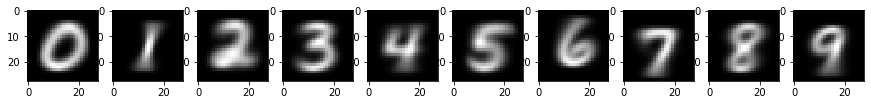

In [10]:
X,x=data_app,label_app
moy_chiff=[]
plt.figure(figsize=(15,2))
for i in range(10):
    moy=np.mean(X[x==i],axis=0)
    moy_chiff+=[moy]
    plt.subplot(1,10,i+1)
    plt.imshow(moy.reshape(28,28),cmap='gray')

<div id="ch:proba-stats"></div>

**Etape 3 :** Pour chaque vecteur de la base de tests, on lui attribue le chiffre dont le centroïde est le plus proche par rapport à la distance euclidienne.
<!-- --- begin exercise --- -->

In [11]:
#Définition de la fonction qui estime le chiffre d'un vecteur de la base de tests:
def estim_chiffre_1(v):
    distances=np.array([np.linalg.norm(v-u) for u in moy_chiff]) #distances entre v et les "chiffres moyens"
    return np.argmin(distances)

In [12]:
#Labels estimés pour les vecteurs de la base de tests:
k=len(data_test)
label_estim_1=np.zeros(k)
for i in range(k):
    label_estim_1[i]=estim_chiffre_1(data_test[i])

<div id="ch:proba-stats"></div>

**Etape 4 :** Finalement, on déduit une estimation du pourcentage de prédictions correctes sur la base de tests.
<!-- --- begin exercise --- -->

In [13]:
np.mean(label_estim_1==label_test)

0.8062142857142857

<div id="ch:proba-stats"></div>

**Conclusion**: Cet algorithme donne alors une estimation exacte d'un chiffre manuscrit dans 80% des cas.
<!-- --- begin exercise --- -->

# 1.1 Distance de Minkowski: p-distance (généralisation)

In [14]:
#Définition de la fonction qui estime le chiffre d'un vecteur de la base de tests en p-distance:
def estim_chiffre(v,p):
    distances=np.array([np.linalg.norm(v-u,p) for u in moy_chiff]) #distances entre v et les "chiffres moyens"
    return np.argmin(distances)

In [19]:
#Labels estimés pour les vecteurs de la base de tests:
k=len(data_test)
for p in range(3,11):
    label_estim=np.zeros(k)
    for i in range(k):
        label_estim[i]=estim_chiffre(data_test[i],p)
    print("précision pour", p ,"est de" ,np.mean(label_estim==label_test))

précision pour 3 est de 0.8205
précision pour 4 est de 0.815
précision pour 5 est de 0.8049285714285714
précision pour 6 est de 0.7945714285714286
précision pour 7 est de 0.786
précision pour 8 est de 0.7793571428571429
précision pour 9 est de 0.7722142857142857
précision pour 10 est de 0.7650714285714286


# 1.2 Similarité cosinus

In [272]:
#On définit la fonction cosine: 
def cosine(u,v):
    return np.inner(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

<div id="ch:proba-stats"></div>
Les deux premières étapes sont les mêmes que la partie 1.
<!-- --- begin exercise --- -->

<div id="ch:proba-stats"></div>

**Etape 3 :** Pour chaque vecteur de la base de tests, on lui attribue le chiffre dont le centroïde est le plus proche par rapport à la distance cosine.
<!-- --- begin exercise --- -->

In [273]:
#Définition de la fonction qui estime le chiffre d'un vecteur de la base de tests:
def estim_chiffre_2(v):
    distances=np.array([cosine(u,v) for u in moy_chiff]) #distances cosine entre v et les "chiffres moyens"
    return np.argmax(distances) #On prend le max car plus l'angle est petit, plus le cos est grand

In [274]:
#Labels estimés pour les vecteurs de la base de tests:
k=len(data_test)
label_estim_2=np.zeros(k)
for i in range(k):
    label_estim_2[i]=estim_chiffre_2(data_test[i])

In [275]:
np.mean(label_estim_2==label_test)

0.8144285714285714

<div id="ch:proba-stats"></div>

**Conclusion**: Cet algorithme donne alors une estimation exacte d'un chiffre manuscrit dans 81% des cas. La similarité cosinus donne une précision plus grande que la distance euclidienne.
<!-- --- begin exercise --- -->